In [ ]:
import os
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [ ]:
class PlotProcessing:
    def __init__(self):
        self.file_path = ''

    def grayzation(self, image):
        gray_image = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        return gray_image

    def gaussian_blur(self, image):
        blurred_image = cv2.GaussianBlur(self.gray_image, (3, 3), 0)
        return blurred_image

    def binarization(self, image):
        _, binary_image = cv2.threshold(self.blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        return binary_image

    def normalize(self, image):
        normal_image = np.interp(image, (image.min(), image.max()), (0, 255)).astype(np.uint8)
        return normal_image

    # /////////////////////////////

    # def __():
    #     kernel = np.ones((1, 1), np.uint8)
    #     img_ = cv2.morphologyEx(img_, cv2.MORPH_CLOSE, kernel)


    def remove_grid(self, image, num_iter=5, background_color: int = 255, grid_size: int = 1) -> np.ndarray:
        img = image.copy()
        _, threshold_image = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        # Remove horizontal lines
        horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 1))
        remove_horizontal = cv2.morphologyEx(
            threshold_image, cv2.MORPH_OPEN, horizontal_kernel, iterations=num_iter
        )
        contour = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contour = contour[0] if len(contour) == 2 else contour[1]
        for c in contour:
            cv2.drawContours(img, [c], -1, background_color, grid_size)

        # Remove vertical lines
        vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 7))
        remove_vertical = cv2.morphologyEx(
            threshold_image, cv2.MORPH_OPEN, vertical_kernel, iterations=num_iter
        )
        contour = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contour = contour[0] if len(contour) == 2 else contour[1]
        for c in contour:
            cv2.drawContours(img, [c], -1, background_color, grid_size)

        # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        # plt.axis('off')
        # plt.show()

        # kernel = np.ones((2, 2), np.uint8)
        # img_ = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

        # plt.imshow(cv2.cvtColor(img_, cv2.COLOR_BGR2RGB))
        # plt.axis('off')
        # plt.show()

        return img

    def show_plot_without_grid(self):
        plt.imshow(cv2.cvtColor(self.image_without_grid, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

    # def axis_transformation(p, P: T.List[geometry.Point]):
    #     """Compute m and offset for model Y = m X + offset that is used to transform
    #     axis X to Y"""

    #     # Currently only linear maps and only 2D.
    #     px, py = zip(*p)
    #     Px, Py = zip(*P)
    #     offX, sX = poly.polyfit(px, Px, 1)
    #     offY, sY = poly.polyfit(py, Py, 1)
    #     return ((sX, sY), (offX, offY))


    # def transform_axis(img, erase_near_axis: int = 0):
    #     global locations_
    #     global points_
    #     # extra: extra rows and cols to erase. Help in containing error near axis.
    #     # compute the transformation between old and new axis.
    #     T = axis_transformation(points_, locations_)
    #     p = geometry.find_origin(locations_)
    #     offCols, offRows = p.x, p.y
    #     logging.info(f"{locations_} → origin {offCols}, {offRows}")
    #     img[:, : offCols + erase_near_axis] = params_["background"]
    #     img[-offRows - erase_near_axis :, :] = params_["background"]
    #     logging.debug(f"Tranformation params: {T}")
    #     return T

    # def list_to_points(points) -> T.List[geometry.Point]:
    #     ps = [geometry.Point.fromCSV(x) for x in points]
    #     return ps

    # def plot_traj(traj, outfile: Path):
    #     global locations_
    #     import matplotlib.pyplot as plt

    #     x, y = zip(*traj)
    #     plt.figure()
    #     plt.subplot(211)

    #     for p in locations_:
    #         csize = img_.shape[0] // 40
    #         cv.circle(img_, (p.x, img_.shape[0] - p.y), csize, 128, -1)

    #     plt.imshow(img_, interpolation="none", cmap="gray")
    #     plt.axis(False)
    #     plt.title("Original")
    #     plt.subplot(212)
    #     plt.title("Reconstructed")
    #     plt.plot(x, y)
    #     plt.tight_layout()
    #     if not str(outfile):
    #         plt.show()
    #     else:
    #         plt.savefig(outfile)
    #         logging.info(f"Saved to {outfile}")
    #     plt.close()

    # def find_trajectory(img: np.ndarray, pixel: int, T):
    #     logging.info(f"Extracting trajectory for color {pixel}")
    #     assert (
    #         img.min() <= pixel <= img.max()
    #     ), f"{pixel} is outside the range: [{img.min()}, {img.max()}]"

    #     # Find all pixels which belongs to a trajectory.
    #     o = 6
    #     _clower, _cupper = _valid_px(pixel - o // 2), _valid_px(pixel + o // 2)

    #     Y, X = np.where((img >= _clower) & (img <= _cupper))
    #     traj = defaultdict(list)
    #     for x, y in zip(X, Y):
    #         traj[x].append(y)

    #     assert traj, "Empty trajectory"

    #     # this is a simple fit using median.
    #     new = np.zeros_like(img)
    #     res = fit_trajectory_using_median(traj, T, new)
    #     return res, np.vstack((img, new))

    # def fit_trajectory_using_median(traj, T, img):
    #     (sX, sY), (offX, offY) = T
    #     res = []
    #     r, _ = img.shape

    #     # x, y = zip(*sorted(traj.items()))
    #     # logging.info((xvec, ys))

    #     for k in sorted(traj):
    #         x = k

    #         vals = np.array(traj[k])

    #         # For each x, we may multiple pixels in column of the image which might
    #         # be y. Usually experience is that the trajectories are close to the
    #         # top rather to the bottom. So we discard call pixel which are below
    #         # the center of mass (median here)
    #         # These are opencv pixles. So there valus starts from the top. 0
    #         # belogs to top row. Therefore > rather than <.
    #         avg = np.median(vals)
    #         vals = vals[np.where(vals >= avg)]
    #         if len(vals) == 0:
    #             continue

    #         # Still we have multiple candidates for y for each x.
    #         # We find the center of these points and call it the y for given x.
    #         y = _find_center(vals)
    #         cv.circle(img, (x, int(y)), 1, 255, -1)
    #         x1 = (x - offX) / sX
    #         y1 = (r - y - offY) / sY
    #         res.append((x1, y1))

    #     # sort by x-axis.
    #     return sorted(res)


    # def _valid_px(val: int) -> int:
    #     return min(max(0, val), 255)

    # def process_image(img):
    #     global params_
    #     global args_
    #     params_ = compute_foregrond_background_stats(img)

    #     T = transform_axis(img, erase_near_axis=3)
    #     assert img.std() > 0.0, "No data in the image!"
    #     logging.info(f" {img.mean()}  {img.std()}")
    #     save_img_in_cache(img, f"{args_.INPUT.name}.transformed_axis.png")

    #     # extract the plot that has color which is farthest from the background.
    #     trajcolor = params_["timeseries_colors"][0]
    #     img = normalize(img)
    #     traj, img = find_trajectory(img, trajcolor, T)
    #     save_img_in_cache(img, f"{args_.INPUT.name}.final.png")
    #     return traj

    # def run(args):
    #     global locations_, points_
    #     global img_, args_
    #     args_ = args

    #     infile = Path(args.INPUT)
    #     assert infile.exists(), f"{infile} does not exists."
    #     logging.info(f"Extracting trajectories from {infile}")

    #     # reads into gray-scale.
    #     img_ = cv.imread(str(infile), 0)
    #     img_ = normalize(img_)

    #     # erosion after dilation (closes gaps)
    #     if args_.preprocess:
    #         kernel = np.ones((1, 1), np.uint8)
    #         img_ = cv.morphologyEx(img_, cv.MORPH_CLOSE, kernel)
    #         save_img_in_cache(img_, Path(f"{args_.INPUT.name}.close.png"))

    #     # remove grids.
    #     img_ = grid.remove_grid(img_)
    #     save_img_in_cache(img_, Path(f"{args_.INPUT.name}.without_grid.png"))

    #     # rescale it again.
    #     img_ = normalize(img_)
    #     logging.debug(" {img_.min()=} {img_.max()=}")
    #     assert img_.max() <= 255
    #     assert img_.min() < img_.mean() < img_.max(), "Could not read meaningful data"
    #     save_img_in_cache(img_, args_.INPUT.name)

    #  ---------current_pos-----------

    #     points_ = list_to_points(args.data_point)
    #     locations_ = list_to_points(args.location)
    #     logging.debug(f"data points {args.data_point} → location on image {args.location}")

    #     if len(locations_) != len(points_):
    #         logging.warning(
    #             "Either the location of data-points are not specified or their numbers don't"
    #             " match with given datapoints. Asking user..."
    #         )
    #         ask_user_to_locate_points(points_, img_)

    #     traj = process_image(img_)

    #     if args_.plot is not None:
    #         plot_traj(traj, args_.plot)

    #     outfile = args.output or f"{args.INPUT}.traj.csv"
    #     with open(outfile, "w") as f:
    #         for r in traj:
    #             f.write("%g %g\n" % (r))
    #     logging.info("Wrote trajectory to %s" % outfile)

    # /////////////////////////////

    def get_lines_Hough(self, gray_image):
        # Extract vertical and horizontal lines in an image using a kernel transform
        height, width = gray_image.shape
        _, threshold_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
        inverted_image = cv2.bitwise_not(threshold_image)

        # Horizontal lines detection
        horizontal_kernel = np.array([[1, 1, 1, 1, 1, 1]])
        vertical_lines_eroded_image = cv2.erode(
            inverted_image, horizontal_kernel, iterations=10)
        vertical_lines_eroded_image = cv2.dilate(
            vertical_lines_eroded_image, horizontal_kernel, iterations=10)

        # Vertical lines detection
        vertical_kernel = np.array([[1],
                        [1],
                        [1],
                        [1],
                        [1],
                        [1],
                        [1]])
        horizontal_lines_eroded_image = cv2.erode(
            inverted_image, vertical_kernel, iterations=10)
        horizontal_lines_eroded_image = cv2.dilate(
            horizontal_lines_eroded_image, vertical_kernel, iterations=10)

        # Combine images
        combined_image = cv2.add(
            vertical_lines_eroded_image, horizontal_lines_eroded_image)

        # Dilate
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
        combined_image_dilated = cv2.dilate(
            combined_image, kernel, iterations=5)

        lines = cv2.HoughLinesP(
            combined_image_dilated, 1, np.pi / 180, 50, None, 50, 10)

        # Recurrent function for checking arrays for emptiness
        def is_not_empty_element(structure):
            if isinstance(structure, list) or isinstance(structure, np.ndarray):
                return any(is_not_empty_element(item) for item in structure)
            elif isinstance(structure, int) or isinstance(structure, np.intc):
                return True
            else:
                return False

        # Finding all vertical and horizontal lines of a table
        vertical_line = []
        horizontal_line = []

        if is_not_empty_element(lines):
            borders = np.concatenate(lines, axis=0)

            # Tolerance parameters at which we consider that the lines are even and intersect
            epsilon = (height + width) * 0.01
            max_y = 0
            max_x = 0
            for x1, y1, x2, y2 in borders:
                if abs(x1 - x2) <= epsilon and abs(y1 - y2) > epsilon:  # Vertical lines
                    if abs(y1 - y2) >= max_y:
                        max_y = abs(y1 - y2)
                        vertical_line.append(
                            (int((x1 + x2) / 2), height - y1, int((x1 + x2) / 2), height - y2))
                elif abs(y1 - y2) <= epsilon and abs(x1 - x2) > epsilon:  # Horizontal lines
                    if abs(x1 - x2) >= max_x:
                        max_x = abs(x1 - x2)
                        horizontal_line.append(
                            (int(x1), height - int((y1 + y2) / 2), int(x2), height - int((y1 + y2) / 2)))

        return (vertical_line, horizontal_line)

    def show_axis_lines(self):
        copy_image = self.gray_image.copy()
        height, width = copy_image.shape
        vertical_line, horizontal_line = self.axis_lines
        for line in vertical_line:
            x1, y1, x2, y2 = line
            cv2.rectangle(copy_image, (x1, height - y1),
                            (x2, height - y2), (0, 255, 0), 10)
        for line in horizontal_line:
            x1, y1, x2, y2 = line
            cv2.rectangle(copy_image, (x1, height - y1),
                            (x2, height - y2), (0, 255, 0), 10)

        plt.imshow(cv2.cvtColor(copy_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

    # def extract_bold_lines(self, gray_image):
    #     _, binary_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY)
    #     plt.imshow(cv2.cvtColor(binary_image, cv2.COLOR_BGR2RGB))
    #     plt.axis('off')
    #     plt.show()

    def remove_text_from_image(self, image):
        image_copy = cv2.resize(image, (image.shape[1] * 4, image.shape[0] * 4))
        height, width, _ = image_copy.shape

        pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
        os.environ['PATH'] += r';C:\Program Files\Tesseract-OCR'
        boxes = pytesseract.image_to_boxes(image_copy)
        box_lines = boxes.strip().split('\n')
        boxes_list = [line.split() for line in box_lines]
        print(boxes_list)

        # Проходим по найденным буквам и удаляем их из изображения
        for box in boxes_list:
            x, y, w, h = int(box[1]), int(box[2]), int(box[3]), int(box[4])
            # if abs(x-w) < width/10 and abs(y-h) < height/10:
            # img_cv2[y:y+h, x:x+w] = [255, 255, 255]  # Заменяем буквы белым цветом
            cv2.rectangle(image_copy, (x, height - y), (w, height - h), (42, 235, 32), 10)

        # contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        # for contour in contours:
        #     x, y, w, h = cv2.boundingRect(contour)
        #     # if area > 0.005 * height * width and w > 0.25 * width and h > 0.5 * w:
        #     x, y, w, h = cv2.boundingRect(contour)
        #     cv2.rectangle(binary_image, (x, height - y),
        #                 (w, height - h), (42, 235, 32), 10)

        # plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
        # plt.axis('off')
        # plt.show()

        # mask = np.ones_like(binary_image) * 255
        # cv2.drawContours(mask, contours, -1, (0, 0, 0), thickness=cv2.FILLED)
        # result_image = cv2.bitwise_and(binary_image, mask)

        # plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        # plt.axis('off')
        # plt.show()

        return image_copy

    def find_points(self, image):
        points = []
        width, height = image.shape

        for x in range(width):
            for y in range(height):
                if image[x, y] == 0:
                    points.append((x, y))

        return points

    def filter_points(self, points):
        filtered_points = np.array(points.copy())

        # Looking for points that are in the neighborhood of each other using KDTree
        kdtree = KDTree(filtered_points)
        neighborhood_nodes = []
        visited = set()
        height, width = self.gray_image.shape
        epsilon = (height + width) * 0.01

        for node in filtered_points:
            if tuple(node) in visited:
                continue

            idxs = kdtree.query_ball_point(node, epsilon)
            visited.update(
                tuple(filtered_points[i]) for i in idxs)

            if len(idxs) > 1:
                mean_node = np.round(
                    np.mean(filtered_points[idxs], axis=0)).astype(int)
                neighborhood_nodes.append(tuple(mean_node))
            else:
                neighborhood_nodes.append(tuple(node))

        return neighborhood_nodes

    def filter_points_with_dbscan(self, points):
        # eps_values = [0.5, 0.8, 1.0, 1.2, 1.5, 1.8, 2]
        # min_samples_values = [2, 3, 4, 5, 6, 7, 8]
        # best_params = {}
        # best_score = -1

        # for eps in eps_values:
        #     for min_samples in min_samples_values:
        #         print(eps, min_samples)
        #         dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        #         cluster_labels = dbscan.fit_predict(points)

        #         # Подсчитаем количество кластеров, игнорируя выбросы (-1 метка)
        #         num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        #         print(num_clusters)
        #         # Исключаем случаи, когда все точки стали выбросами
        #         if num_clusters > 0:
        #             silhouette_avg = silhouette_score(points, cluster_labels)
        #             print(silhouette_avg)
        #             if silhouette_avg > best_score:
        #                 best_score = silhouette_avg
        #                 best_params = {'eps': eps, 'min_samples': min_samples, 'num_clusters': num_clusters}


        best_params = {'eps': 5, 'min_samples': 5, 'num_clusters': 4}
        print(f'Best params: eps={best_params["eps"]}, min_samples={best_params["min_samples"]}')
        dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
        cluster_labels = dbscan.fit_predict(points)

        return points, cluster_labels

    def remove_small_clusters(self, points, cluster_labels, min_cluster_size):
        unique_labels, label_counts = np.unique(cluster_labels, return_counts=True)
        to_remove = set(unique_labels[label_counts < min_cluster_size])

        filtered_data = [point for i, point in enumerate(points) if cluster_labels[i] not in to_remove]

        return filtered_data

    def show_points(self, points):
        image_copy = self.gray_image.copy()
        y_coords, x_coords = zip(*points)
        plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
        plt.scatter(x_coords, y_coords, c='red', marker='o', s=2)
        plt.axis('off')
        plt.show()

    def visualize_clusters(self, points, cluster_labels):
        unique_labels = np.unique(cluster_labels)

        colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

        for label, color in zip(unique_labels, colors):
            cluster_points = np.array([points[i] for i in range(len(points)) if cluster_labels[i] == label])
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=color, label=f'Cluster {label}')

        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('DBSCAN Clustering')
        plt.legend()
        plt.show()

# Go from left to right and scanning area for intercections with function lines and add every point to array
# Add points to list of some lines has the same points
# Filter points with DBSCAN

    def digitize_plot(self, image_path):
        self.image_path = image_path
        self.image = cv2.imread(self.image_path)
        self.gray_image = self.grayzation(self.image)
        self.blurred_image = self.gaussian_blur(self.gray_image)
        self.binary_image = self.binarization(self.blurred_image)
        # self.normal_image = self.normalize(self.image)
        # self.extract_bold_lines(self.gray_image)
        self.remove_text_from_image(self.image)

        # for image in [self.binary_image, self.blurred_image, self.gray_image]:
        #     plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        #     plt.axis('off')
        #     plt.show()

        # self.axes_and_lines = self.detect_axes_and_lines(self.binary_image)
        # self.show_axes_and_lines(self.axes_and_lines)
        self.axis_lines = self.get_lines_Hough(self.gray_image)
        # self.show_axis_lines()
        self.image_without_grid = self.remove_grid(self.gray_image, num_iter=10, background_color = 255, grid_size = 2)
        # self.show_plot_without_grid()
        self.points = self.find_points(self.image_without_grid)
        self.show_points(self.points)
        self.neighborhood_points = self.filter_points(self.points)
        self.show_points(self.neighborhood_points)

        self.filtered_points, self.cluster_labels = self.filter_points_with_dbscan(self.neighborhood_points)
        self.visualize_clusters(self.filtered_points, self.cluster_labels)
        min_cluster_size = 10
        self.filtered_points = self.remove_small_clusters(self.points, self.cluster_labels, min_cluster_size)

        self.show_points(self.filtered_points)


[['~', '0', '111', '0', '1820', '0']]


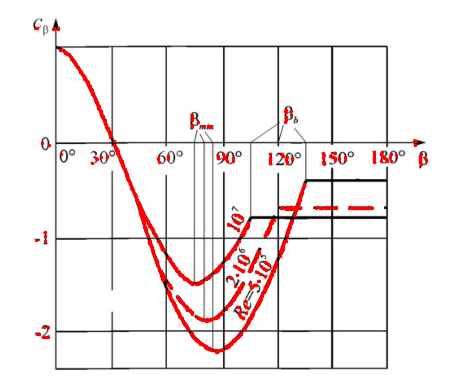

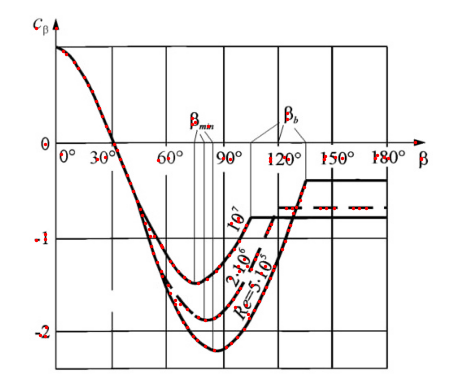

Best params: eps=5, min_samples=5


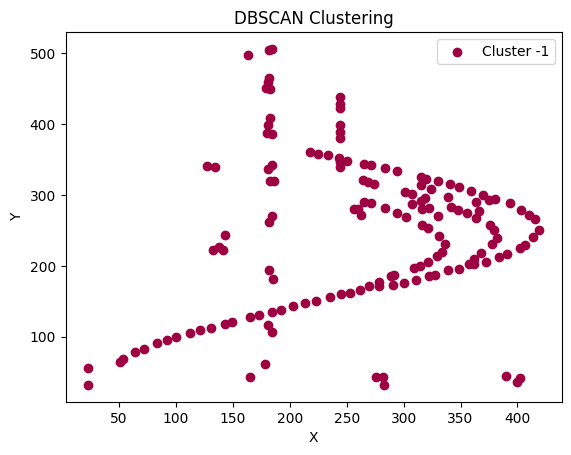

IndexError: index 154 is out of bounds for axis 0 with size 154

In [ ]:
processor = PlotProcessing()
image_path = "test.jpg"

processor.digitize_plot(image_path)

In [ ]:
import matplotlib.pyplot as plt
import keras_ocr
import cv2
import math
import numpy as np

Looking for C:\Users\dsash\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\dsash\.keras-ocr\crnn_kurapan.h5


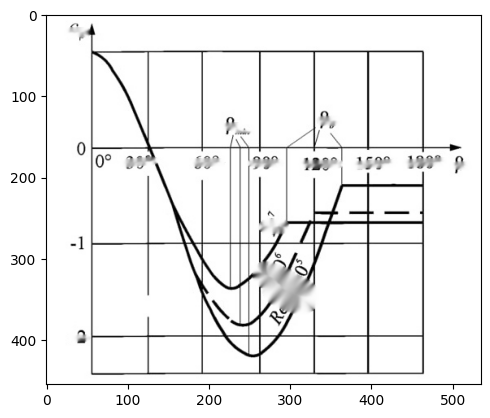

In [ ]:
#General Approach.....
#Use keras OCR to detect text, define a mask around the text, and inpaint the
#masked regions to remove the text.
#To apply the mask we need to provide the coordinates of the starting and
#the ending points of the line, and the thickness of the line

#The start point will be the mid-point between the top-left corner and
#the bottom-left corner of the box.
#the end point will be the mid-point between the top-right corner and the bottom-right corner.
#The following function does exactly that.
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)

#Main function that detects text and inpaints.
#Inputs are the image path and kreas_ocr pipeline
def inpaint_text(img_path, pipeline):
    # read the image
    img = keras_ocr.tools.read(img_path)

    # Recogize text (and corresponding regions)
    # Each list of predictions in prediction_groups is a list of
    # (word, box) tuples.
    prediction_groups = pipeline.recognize([img])

    #Define the mask for inpainting
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1]
        x2, y2 = box[1][2]
        x3, y3 = box[1][3]

        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)

        #For the line thickness, we will calculate the length of the line between
        #the top-left corner and the bottom-left corner.
        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))

        #Define the line and inpaint
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255, int(thickness/2))
        inpainted_img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)

    return(inpainted_img)

# keras-ocr will automatically download pretrained
# weights for the detector and recognizer.
pipeline = keras_ocr.pipeline.Pipeline()

img_text_removed = inpaint_text('test.jpg', pipeline)

plt.imshow(img_text_removed)

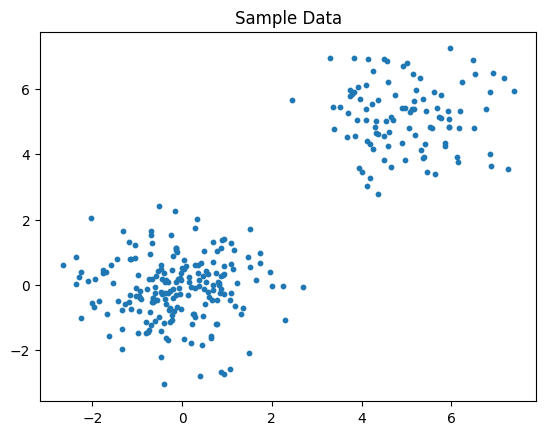

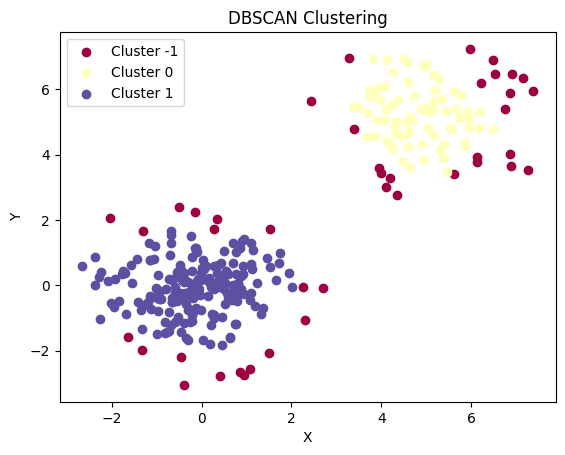

In [ ]:
def generate_sample_data():
    np.random.seed(0)
    n_samples = 300
    X = np.random.randn(n_samples, 2)
    X[:100] += 5
    return X

sample_data = generate_sample_data()
plt.scatter(sample_data[:, 0], sample_data[:, 1], s=10)
plt.title('Sample Data')
plt.show()

dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels = dbscan.fit_predict(sample_data)

def visualize_clusters(points, cluster_labels):
    unique_labels = np.unique(cluster_labels)

    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

    for label, color in zip(unique_labels, colors):
        cluster_points = np.array([points[i] for i in range(len(points)) if cluster_labels[i] == label])
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=color, label=f'Cluster {label}')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('DBSCAN Clustering')
    plt.legend()
    plt.show()

visualize_clusters(sample_data, cluster_labels)